<a href="https://colab.research.google.com/github/AbrarKarim01/COMP-5011-ML_NN/blob/main/Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection and Pre Processing

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.decomposition import PCA
import numpy as np
from scipy.stats import zscore

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
harDataset = pd.read_csv('/content/gdrive/MyDrive/COMP-5011/Human Activity Recognition/harDataset.csv')
harDataset.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
harDataset.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284,16.146422
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898,8.679067
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880,9.000000
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882,17.000000
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970,24.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000


In [ ]:
harDataset.shape

(10299, 563)

Checking for duplicates and null values

In [ ]:
print('Duplicates in dataset: {}'.format(sum(harDataset.duplicated())))
print('Null values in dataset: {}'.format(harDataset.isnull().values.sum()))

Duplicates in dataset: 0
Null values in dataset: 0


Dataset Distribution

<ipython-input-7-a98f80ce10a0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.countplot(x="Activity", data=harDataset, palette=custom_palette)


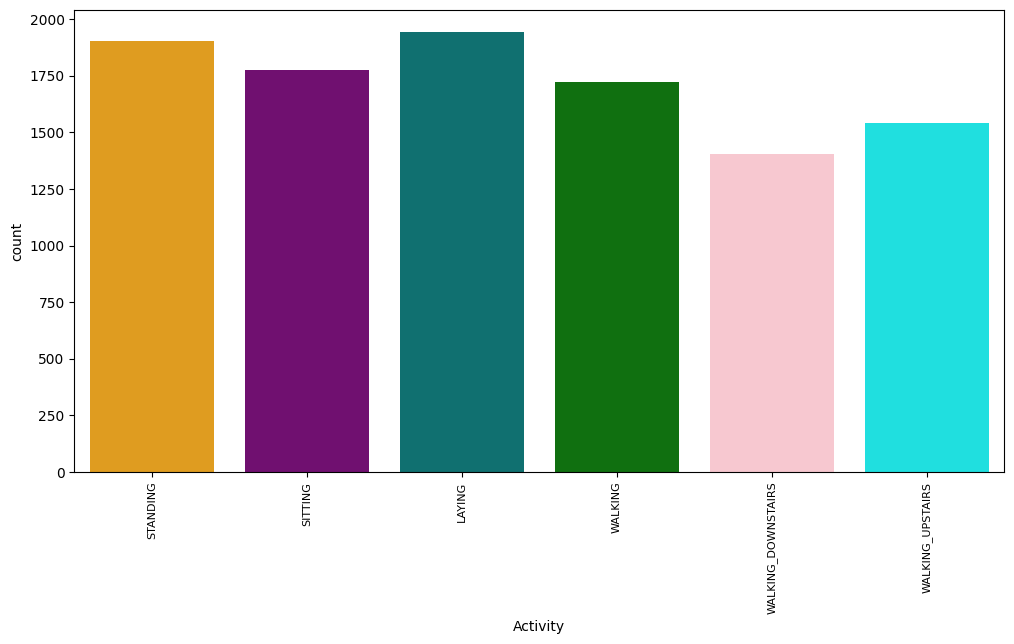

In [ ]:
custom_palette = {
    'WALKING': 'green',
    'WALKING_UPSTAIRS': 'cyan',
    'WALKING_DOWNSTAIRS': 'pink',
    'SITTING': 'purple',
    'STANDING': 'orange',
    'LAYING': 'teal'
}

plt.figure(figsize=(12,6))
axis = sns.countplot(x="Activity", data=harDataset, palette=custom_palette)
plt.xticks(rotation='vertical', size=8)
plt.show()

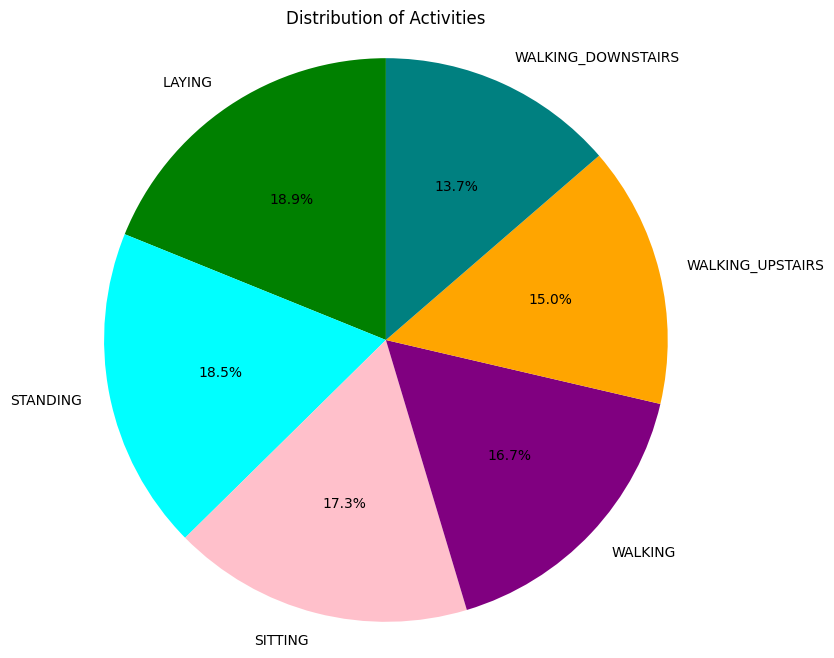

In [ ]:
# Calculate percentiles for the 'Activity' column
activity_percentiles = harDataset['Activity'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(activity_percentiles, labels=activity_percentiles.index, autopct='%1.1f%%', startangle=90, colors=list(custom_palette.values()))
plt.title('Distribution of Activities')
plt.axis('equal')
plt.show()

3D visualization

In [ ]:
color_map = {
    'LAYING': 'red',
    'STANDING': 'blue',
    'SITTING': 'green',
    'WALKING': 'purple',
    'WALKING_UPSTAIRS': 'orange',
    'WALKING_DOWNSTAIRS': 'cyan'
}


X = harDataset.drop('Activity', axis=1)
y = harDataset['Activity']

pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=[f'PC_{i+1}' for i in range(3)])

pca_df['Activity'] = y

pca_df.head()

# Creating the 3D scatter plot
fig = px.scatter_3d(
    pca_df,
    x='PC_1',
    y='PC_2',
    z='PC_3',
    color='Activity',
    color_discrete_map=color_map,
    title='PCA Visualization of Activities',
    labels={'PC_1': 'Principal Component 1',
            'PC_2': 'Principal Component 2',
            'PC_3': 'Principal Component 3'}
)

fig.update_layout(
    scene = dict(
        xaxis_title='PC 1',
        yaxis_title='PC 2',
        zaxis_title='PC 3'
    ),
    legend_title='Activity'
)

fig.show()

Lable encoding

In [ ]:
le = LabelEncoder()
harDataset['Activity'] = le.fit_transform(harDataset['Activity'])
activity_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Activity mapping:", activity_mapping)

Activity mapping: {'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}


Corelation heatmap of the top 20 features

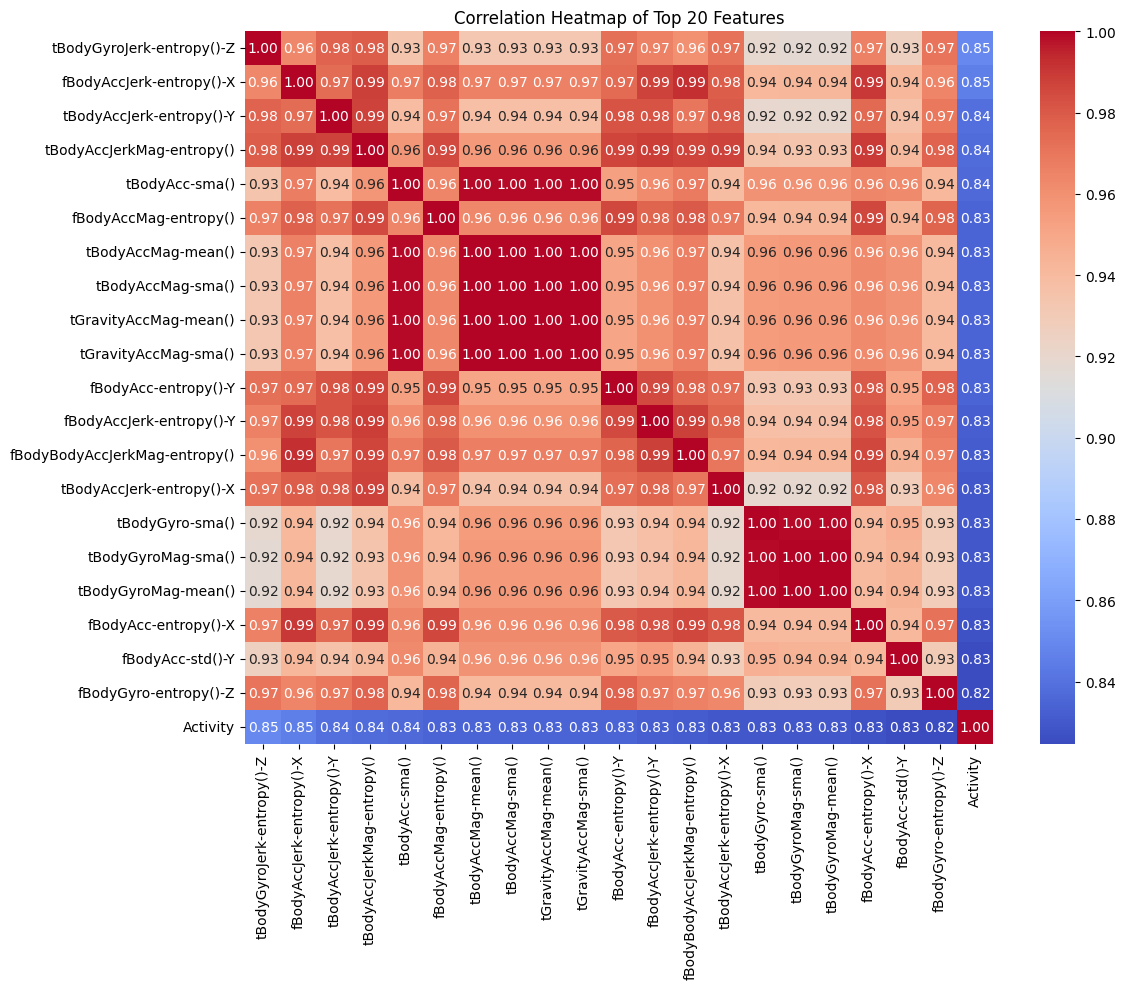

In [ ]:
correlations = harDataset.corr()['Activity'].abs().sort_values(ascending=False)
top_features = correlations[1:21].index.tolist()
plt.figure(figsize=(12, 10))
sns.heatmap(harDataset[top_features + ['Activity']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Top 20 Features')
plt.tight_layout()
plt.show()

Outlier detection with PCA

In [ ]:
pca = PCA(n_components= 29)
reduced_data = pca.fit_transform(harDataset.iloc[:, :-3])
z_scores_pca = np.abs(zscore(reduced_data))
outliers_pca = (z_scores_pca > 3).any(axis=1)
harDataset['PCA_Outlier'] = outliers_pca
print(harDataset['PCA_Outlier'].value_counts())
harDataset.head()

PCA_Outlier
False    9126
True     1173
Name: count, dtype: int64


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,PCA_Outlier
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2,False
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2,False
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,2,False
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,2,False
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,2,False


Visualization of the Outliers in 2d plane using the first two pca components

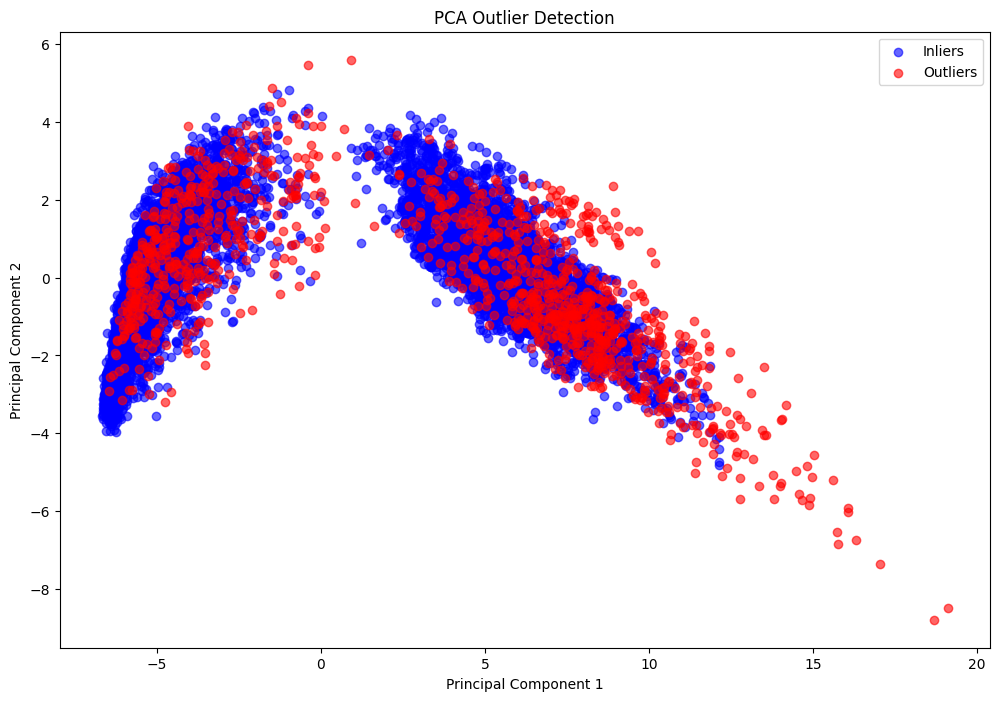

In [ ]:
harDataset['PCA_1'] = reduced_data[:, 0]
harDataset['PCA_2'] = reduced_data[:, 1]

plt.figure(figsize=(12, 8))
plt.scatter(
    harDataset.loc[~harDataset['PCA_Outlier'], 'PCA_1'],
    harDataset.loc[~harDataset['PCA_Outlier'], 'PCA_2'],
    color='blue', label='Inliers', alpha=0.6
)
plt.scatter(
    harDataset.loc[harDataset['PCA_Outlier'], 'PCA_1'],
    harDataset.loc[harDataset['PCA_Outlier'], 'PCA_2'],
    color='red', label='Outliers', alpha=0.6
)
harDataset.drop('PCA_Outlier', axis=1, inplace=True)
harDataset.drop('PCA_1', axis=1, inplace=True)
harDataset.drop('PCA_2', axis=1, inplace=True)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Outlier Detection')
plt.legend()
plt.show()

# Feature Engineering and Selection

Check the variance which has the best PCA

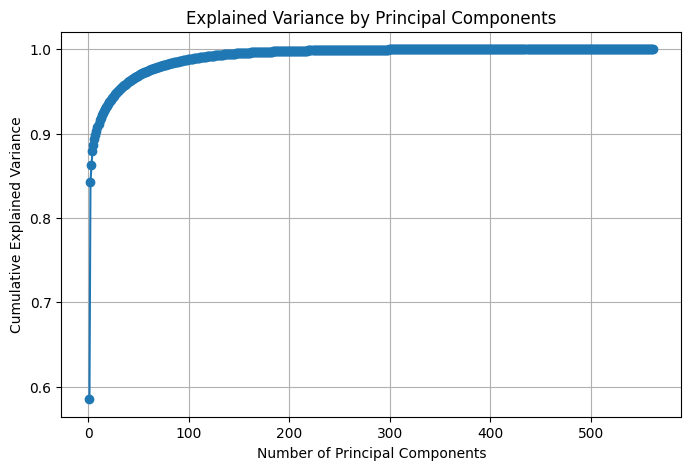

Number of components to retain 95% variance: 29


,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,Activity
0,-14.516791,-7.040348,0.848517,1.311452,-1.918762,-0.754556,0.576247,-0.192814,0.673816,-1.212133,...,-0.078554,0.424375,0.476503,-0.496417,0.103025,0.315891,0.767794,0.385277,0.870693,2
1,-14.512251,-7.066135,0.714288,1.728410,-0.957263,-0.503252,-0.936521,-0.066616,-0.860003,-0.824904,...,-0.074631,0.143033,-0.541779,0.051106,-0.086291,0.097132,0.440175,-0.152991,-0.277432,2
2,-14.521702,-7.002312,0.434467,2.051527,-0.740811,0.106743,0.095229,-0.016855,-0.017005,-0.098009,...,0.067551,0.263619,-0.849928,-0.066437,-0.226349,0.109345,-0.183628,0.331113,-0.018467,2
3,-14.499971,-7.202094,-0.218497,2.058371,-0.477533,-0.697812,-0.861611,-0.692418,-0.506246,0.514871,...,0.239330,-0.217249,0.026504,0.171180,0.490321,-0.219587,0.055055,0.073012,0.263204,2
4,-14.491649,-7.270128,-0.422661,2.277227,-0.468014,-0.357469,-0.282462,-0.252537,-0.094981,0.543678,...,0.365778,-0.164534,0.094855,-0.008105,0.344132,0.482475,-0.351103,-0.253227,-0.280327,2


In [ ]:
X = harDataset.drop('Activity', axis=1)
y = harDataset['Activity']

pca = PCA()
pca.fit(X)
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()
n_components = next(i for i, cumulative_var in enumerate(explained_variance) if cumulative_var >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Creating a DataFrame with the reduced data
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC_{i+1}' for i in range(n_components)])
pca_df['Activity'] = y
pca_df.head()

Dimentionality reduction with PCA approch.

In [ ]:
X = harDataset.drop('Activity', axis=1)
y = harDataset['Activity']
pca = PCA(n_components = 29)
X_pca = pca.fit_transform(X)
X_pca.shape
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC_{i+1}' for i in range(X_pca.shape[1])])

# Adding the target variable back to the DataFrame
pca_df['Activity'] = y
pca_df.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,Activity
0,-14.516791,-7.040348,0.848517,1.311452,-1.918762,-0.754556,0.576247,-0.192814,0.673816,-1.212133,...,-0.078554,0.424375,0.476503,-0.496417,0.103025,0.315891,0.767794,0.385277,0.870693,2
1,-14.512251,-7.066135,0.714288,1.728410,-0.957263,-0.503252,-0.936521,-0.066616,-0.860003,-0.824904,...,-0.074631,0.143033,-0.541779,0.051106,-0.086291,0.097132,0.440175,-0.152991,-0.277432,2
2,-14.521702,-7.002312,0.434467,2.051527,-0.740811,0.106743,0.095229,-0.016855,-0.017005,-0.098009,...,0.067551,0.263619,-0.849928,-0.066437,-0.226349,0.109345,-0.183628,0.331113,-0.018467,2
3,-14.499971,-7.202094,-0.218497,2.058371,-0.477533,-0.697812,-0.861611,-0.692418,-0.506246,0.514871,...,0.239330,-0.217249,0.026504,0.171180,0.490321,-0.219587,0.055055,0.073012,0.263204,2
4,-14.491649,-7.270128,-0.422661,2.277227,-0.468014,-0.357469,-0.282462,-0.252537,-0.094981,0.543678,...,0.365778,-0.164534,0.094855,-0.008105,0.344132,0.482475,-0.351103,-0.253227,-0.280327,2


# Model Selection and Training

SVM on harDataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

X = harDataset.drop('Activity', axis=1)
y = harDataset['Activity']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_val_pred = svm_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy of the SVM model: {val_accuracy}")
y_pred = svm_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy of the SVM model: {accuracy}")

Validation Accuracy of the SVM model: 0.9792880258899677
Test Accuracy of the SVM model: 0.9805825242718447


Confusion Matrix of SVM on harDataset

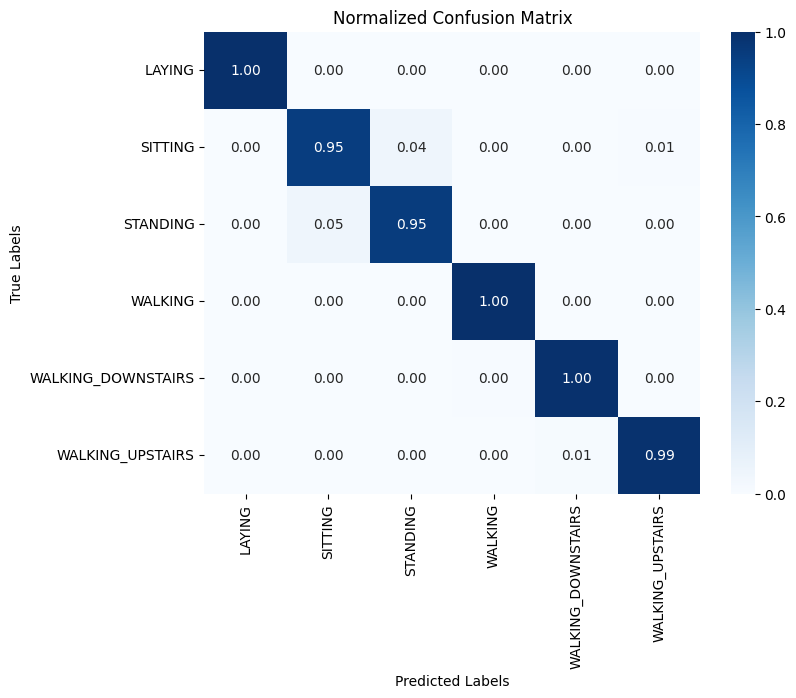

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Normalized Confusion Matrix")
plt.show()

SVM on PCA dataset

In [ ]:
X = pca_df.drop('Activity', axis=1)
y = pca_df['Activity']

X_train_pca, X_temp_pca, y_train_pca, y_temp_pca = train_test_split(X, y, test_size=0.3, random_state=42)
X_val_pca, X_test_pca, y_val_pca, y_test_pca = train_test_split(X_temp_pca, y_temp_pca, test_size=0.5, random_state=42)

# SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_pca, y_train_pca)
y_val_pred_pca = svm_classifier.predict(X_val_pca)
val_accuracy = accuracy_score(y_val_pca, y_val_pred_pca)
print(f"Validation Accuracy of the SVM model: {val_accuracy}")
y_pred_pca = svm_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test_pca, y_pred_pca)
print(f"Test Accuracy of the SVM model: {accuracy}")

Validation Accuracy of the SVM model: 0.9365695792880259
Test Accuracy of the SVM model: 0.9346278317152104


Confusion Matrix of PCA dataset

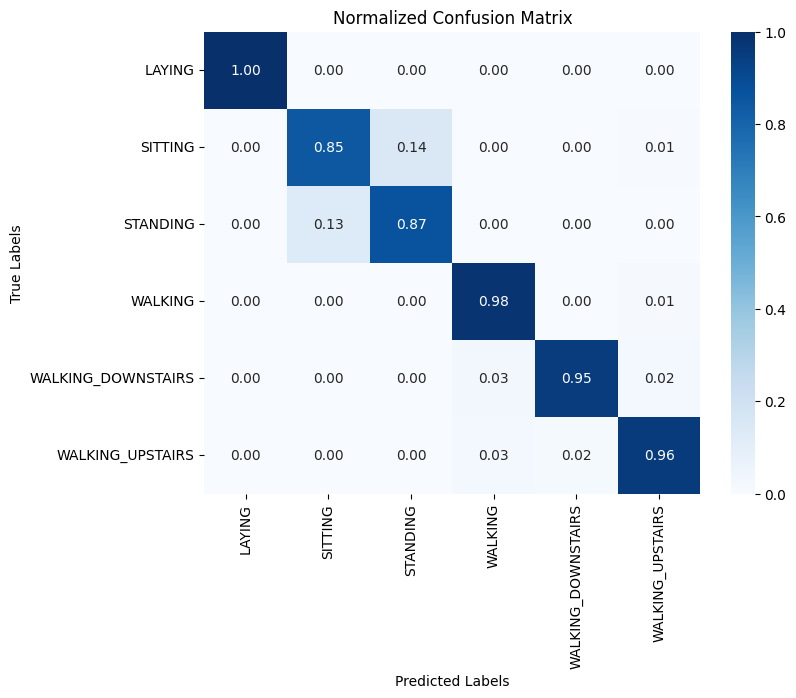

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_pca, y_pred_pca, normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Normalized Confusion Matrix")
plt.show()

# Model Evaluation and Performance

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score

# Calculating precision, recall, and F1-score for each label
precision = precision_score(y_test_pca, y_pred_pca, average=None)
recall = recall_score(y_test_pca, y_pred_pca, average=None)
f1 = f1_score(y_test_pca, y_pred_pca, average=None)

for i, label in enumerate(le.classes_):
    print(f"Label: {label}")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall: {recall[i]:.4f}")
    print(f"  F1-score: {f1[i]:.4f}")

Label: LAYING
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Label: SITTING
  Precision: 0.8669
  Recall: 0.8476
  F1-score: 0.8571
Label: STANDING
  Precision: 0.8561
  Recall: 0.8689
  F1-score: 0.8625
Label: WALKING
  Precision: 0.9588
  Recall: 0.9824
  F1-score: 0.9704
Label: WALKING_DOWNSTAIRS
  Precision: 0.9747
  Recall: 0.9507
  F1-score: 0.9626
Label: WALKING_UPSTAIRS
  Precision: 0.9558
  Recall: 0.9558
  F1-score: 0.9558


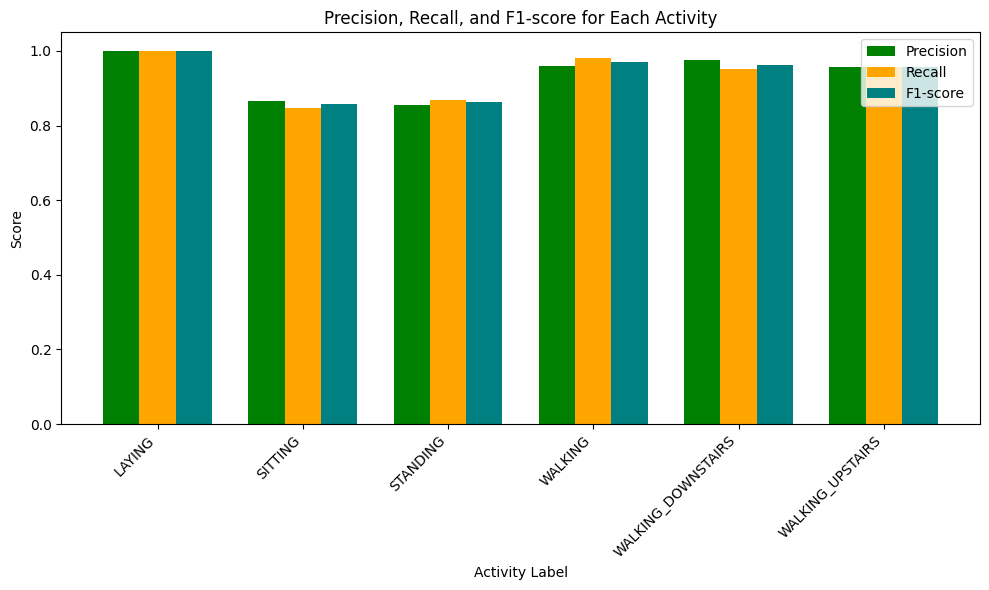

In [ ]:
plt.figure(figsize=(10, 6))
bar_width = 0.25
index = range(len(le.classes_))

plt.bar(index, precision, bar_width, label='Precision', color='green')
plt.bar([i + bar_width for i in index], recall, bar_width, label='Recall', color='orange')
plt.bar([i + 2 * bar_width for i in index], f1, bar_width, label='F1-score', color='teal')

plt.xlabel('Activity Label')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score for Each Activity')
plt.xticks([i + bar_width for i in index], le.classes_, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()